In [272]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_profiling as pdp

# csv read
train = pd.read_csv('data/train.csv')
test  = pd.read_csv('data/test.csv')

# trandform sex to 0, 1
train['Sex'] = train['Sex'].map(lambda x: 0 if  x == 'male' else 1)

# transform nan of Age to median
train['Age'].fillna(train['Age'].median(), inplace=True)

# delete nan of Emberked
train = train[train['Embarked'].notnull()]

# create feature Family
train['Family'] = train['SibSp'] + train['Parch'] + 1

# create feature Alone
train['Alone'] = train['Family'].map(lambda x: 1 if  x == 1 else 0)

def transform_features(data):
    # trandform sex to 0, 1
    data['Sex'] = data['Sex'].map(lambda x: 0 if  x == 'male' else 1)

    # transform nan of Age to median
    train['Age'].fillna(train['Age'].median(), inplace=True)

    # delete nan of Emberked
    train = train[train['Embarked'].notnull()]

    # create feature Family
    train['Family'] = train['SibSp'] + train['Parch'] + 1

    # create feature Alone
    train['Alone'] = train['Family'].map(lambda x: 1 if  x == 1 else 0)   

def display_survived_of_sex():
    sns.countplot(x='Sex', hue='Survived', data=train)
    plt.legend(['Dead', 'Servived'])
    plt.xticks([0, 1], ['Male', 'Female'])
    plt.show()
    display(pd.crosstab(train['Sex'], train['Survived']))
    display(pd.crosstab(train['Sex'], train['Survived'], normalize='index'))
#display_survived_of_sex()


def display_survived_of_pclass():
    sns.countplot(x='Pclass', hue='Survived', data=train, palette='Set3')
    plt.title('Servived per Pclass')
    plt.legend(['Dead', 'Servived'])
    plt.show()

    display(pd.crosstab(train['Pclass'], train['Survived']))
    display(pd.crosstab(train['Pclass'], train['Survived'], normalize='index'))
#display_survived_of_pclass()

def create_survived_per_pclass():
    # 生存者の割合をチケットクラスごとに出す
    # クラスごとの総数
    pclass_1 = train.query('Pclass == 1')
    pclass_2 = train.query('Pclass == 2')
    pclass_3 = train.query('Pclass == 3')
    # クラスごとの生存者数のパーセントの特徴量を追加
    train.loc[train['Pclass'] == 1, 'Servived_Per_Pclass'] = pclass_1.query('Survived == 1').shape[0] / pclass_1.shape[0] 
    train.loc[train['Pclass'] == 2, 'Servived_Per_Pclass'] = pclass_2.query('Survived == 1').shape[0] / pclass_2.shape[0] 
    train.loc[train['Pclass'] == 3, 'Servived_Per_Pclass'] = pclass_3.query('Survived == 1').shape[0] / pclass_3.shape[0] 
create_survived_per_pclass()

def display_histogram_of_age_and_survived():
    # Age
    sns.distplot(train['Age'].dropna(), kde=False, bins=30, label='All')
    
    # Survived(dead)
    dead = train.query('Survived == 0')
    sns.distplot(dead['Age'].dropna(), kde=False, bins=30, label='Dead')
    
    # Survived(Survived)
    survived = train.query('Survived == 1')
    sns.distplot(survived['Age'].dropna(), kde=False, bins=30, label='Servived')
    plt.title('Age histogram')
    plt.legend()
#display_histogram_of_age_and_survived()

# create feature CategoricalAge(Age cut 8)
#train['CategoricalAge'] = pd.cut(train['Age'], 8)
bins = 8
train['CategoricalAge'] = pd.cut(train['Age'], bins, labels=[f'bin_{i}' for i in range(bins)])

def display_categorical_age():
    sns.countplot(x='CategoricalAge', hue='Survived', data=train)
    plt.title('CategoricalAge')
    plt.show()
    display(pd.crosstab(train['CategoricalAge'], train['Survived']))
    display(pd.crosstab(train['CategoricalAge'], train['Survived'], normalize='index'))
#display_categorical_age()

## グラフとクロスタブから読み取れること
* 10.368以下は生存率の方が高い
* 20.315 ~ 30.263の間、60.105 ~ はかなり死亡率が高い  
→ 子供を庇ったとかあるのか？

In [273]:
#pdp.ProfileReport(train)
# 兄弟、配偶者
#sns.countplot(x='SibSp', data=train)
#plt.title('sibsp')

# 連れが2人以上は少ないので、連れが0, 1, 2以上で分けた特徴量を生成する
train['SibSp_Overlap'] = [i if i <= 1 else 2 for i in train['SibSp']]
display(pd.crosstab(train['SibSp_Overlap'], train['Survived']))
display(pd.crosstab(train['SibSp_Overlap'], train['Survived'], normalize='index'))

# SibSp_0_1_2overごとに集計し、可視化
#sns.countplot(x='SibSp_Overlap', hue='Survived', data=train)
#plt.legend(['Dead', 'Survived'])
#plt.xticks([0, 1, 2], ['0', '1', '>=2'])
#plt.title('SibSb and Survived')
#plt.show()


Survived,0,1
SibSp_Overlap,,
0,398,208
1,97,112
2,54,20


Survived,0,1
SibSp_Overlap,,
0,0.656766,0.343234
1,0.464115,0.535885
2,0.729730,0.270270


Survived,0,1
Parch_Overlap,,
0,445,231
1,53,65
2,40,40
3,11,4


Survived,0,1
Parch_Overlap,,
0,0.658284,0.341716
1,0.449153,0.550847
2,0.500000,0.500000
3,0.733333,0.266667


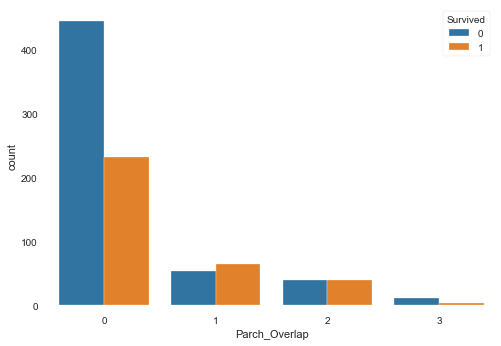

In [274]:
# Parchについても同様に可視化する
#sns.countplot(x='Parch', data=train)
#plt.title('Count of Parch')
#x = train['Parch'].unique()
#xticks = list(map(lambda x: str(x) + 'P', x))
#plt.xticks(x ,xticks)
#plt.show()

# これも3人以上はほぼ同様なのでまとめる
train['Parch_Overlap'] = [x if x <= 2 else 3 for x in train['Parch']]
sns.countplot(x='Parch_Overlap', hue='Survived', data=train)

display(pd.crosstab(train['Parch_Overlap'], train['Survived']))
display(pd.crosstab(train['Parch_Overlap'], train['Survived'], normalize='index'))

## グラフから読み取れること
* 親子が１人の場合は生き残る率の方が高い
* 3人以上は死にやすい

In [275]:
# Fare
#sns.distplot(train['Fare'].dropna(), kde=False, hist=True, color='green')
#plt.title('Fare Histgram')

# 各運賃のばらつきを4つ等しく分割する
#train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
bins = 4
train['CategoricalFare'] = pd.qcut(train['Fare'], bins, labels=[f'bin_{i}' for i in range(bins)])
train['CategoricalFare'].unique()

display(pd.crosstab(train['CategoricalFare'], train['Survived']))
display(pd.crosstab(train['CategoricalFare'], train['Survived'], normalize='index'))


Survived,0,1
CategoricalFare,,
bin_0,179,44
bin_1,156,68
bin_2,121,101
bin_3,93,127


Survived,0,1
CategoricalFare,,
bin_0,0.802691,0.197309
bin_1,0.696429,0.303571
bin_2,0.545045,0.454955
bin_3,0.422727,0.577273


In [276]:
# Nameの変換, まずは確認
#display(train['Name'].head())

# 敬称を抽出する
#set(train['Name'].str.extract('([A-Za-z]+)\.', expand=False))

#display(train['Name'].str.extract('([A-Za-z]+)\.', expand=False).value_counts())

# 敬称の列を生成
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)

# 敬称ごとの平均
train.groupby('Title').mean()['Age']

"""
グラフから読み取れること
* Masterの平均年齢が低いことから、子供だと推測される
* 子供の生存率がよかったので、特徴量として使えそう
* Masterとその他個数の多かった、Mr, Miss, Mrsとそれ以外で特徴を作成する
"""

# 変換用の関数
def title_to_categorize(x):
    if x == 'Master':
        r = 0
    elif x == 'Mr':
        r = 1
    elif x == 'Miss':
        r = 2
    elif x == 'Mrs':
        r = 3
    else:
        r = 4
    return r

# 特徴量として追加
train['TitleCategorize'] = train['Title'].map(title_to_categorize)

# display(train[['TitleCategorize', 'Title']].sample(5))

train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Family,Alone,Servived_Per_Pclass,CategoricalAge,SibSp_Overlap,Parch_Overlap,CategoricalFare,Title,TitleCategorize
728,729,0,2,"Bryhl, Mr. Kurt Arnold Gottfrid",0,25.0,1,0,236853,26.0000,...,S,2,0,0.472826,bin_2,1,0,bin_2,Mr,1
848,849,0,2,"Harper, Rev. John",0,28.0,0,1,248727,33.0000,...,S,2,0,0.472826,bin_2,0,1,bin_3,Rev,4
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",1,1.0,0,2,2653,15.7417,...,C,3,0,0.242363,bin_0,0,2,bin_2,Miss,2


In [277]:
# one-hot エンコーディング
train = pd.get_dummies(train, columns=['Sex', 'Embarked'])
test  = pd.get_dummies(test, columns=['Sex', 'Embarked'])

train.sample(3)

# 不要な列を削除
train.drop(['PassengerId', 'Name', 'Cabin', 'Ticket', 'Title'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

display(train.sample(3))

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Alone,Servived_Per_Pclass,CategoricalAge,SibSp_Overlap,Parch_Overlap,CategoricalFare,TitleCategorize,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S
191,0,2,19.0,0,0,13.000,1,1,0.472826,bin_1,0,0,bin_1,1,1,0,0,0,1
24,0,3,8.0,3,1,21.075,5,0,0.242363,bin_0,2,1,bin_2,2,0,1,0,0,1
51,0,3,21.0,0,0,7.800,1,1,0.242363,bin_2,0,0,bin_0,1,1,0,0,0,1


In [294]:
from sklearn.model_selection import KFold

# xとyに分ける
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

kf = KFold(n_splits=3, shuffle=True, random_state=111)

models = []
scores = []

folds = kf.split(X_train, y_train)

for i, (train_idx, valid_idx) in enumerate(folds):
    # 分割の範囲のインデックスごとに、分ける

    train_x = X_train.iloc[train_idx]
    train_y = y_train.iloc[train_idx]

    valid_x = X_train.iloc[valid_idx]
    valid_y = y_train.iloc[valid_idx]

    # Dataset
    lgb_train = lgb.Dataset(train_x, train_y)
    lgb_valid = lgb.Dataset(valid_x, valid_y)

    # ハイパーパラメータを定義
    lgbm_params = {'objective': 'binary'}
    
    # 学習
    gbm = lgb.train(params=lgbm_params, train_set=lgb_train, valid_sets=[lgb_train, lgb_valid], verbose_eval=-1)

    # 0 ~ 1の間で0.5を超えるものは1として予測する
    oof = (gbm.predict(valid_x) > 0.5).astype(int)
    scores.append(round(accuracy_score(valid_y, oof)*100,2))
    models.append(gbm)
print(scores, 'mean scores : ', round(np.mean(scores), 2))


[82.15, 83.78, 78.38] mean scores :  81.44


In [295]:
# テストデータで予測を行う
preds = np.zeros(len(test), len(models))
for gbm in models:
    pred = gbm.predict(test)
    preds.join(pred)

ValueError: train and valid dataset categorical_feature do not match.